# Class imbalance problem

### Problem statement: Predicting wine quality

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read data

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

## Add a feature 'wine type'

In [3]:
red_wine['wine_type'] = 'red'   # add a column for the type
white_wine['wine_type'] = 'white'

## Merge both datasets

In [4]:
wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

## Add a feature 'quality_label' and check condition

In [5]:
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

## Shuffle observations

In [6]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
#Red wine + White wine
wines.shape

(6497, 14)

In [8]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,6.0,0.28,0.35,1.9,0.037,16.0,120.0,0.99330,3.16,0.69,10.6,5,white,low
1,6.7,0.26,0.49,8.1,0.052,48.0,197.0,0.99558,3.19,0.48,9.5,5,white,low
2,6.5,0.21,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,7,white,medium
3,6.4,0.41,0.24,14.0,0.048,24.0,113.0,0.99820,3.44,0.53,9.8,6,white,medium
4,7.0,0.42,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,5,red,low


In [9]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
quality_label            object
dtype: object

## Check balance or imbalance class

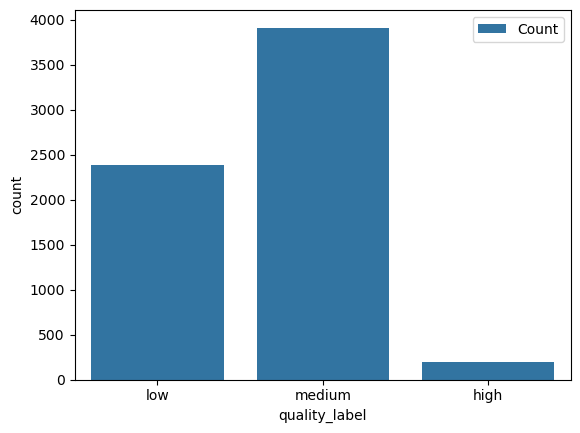

In [10]:
sns.countplot(x=wines['quality_label'],label="Count")
plt.show()

## Drop last 3 features and create X and y

In [11]:
X = wines.drop(['quality','wine_type','quality_label'], axis= 1)
y = wines['quality_label']

## Split data

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Scale the data

In [13]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data using the same scaler
X_test = scaler.transform(X_test)

In [14]:
print('Shape of train data',X_train.shape)

print('Shape of test data',X_test.shape)

Shape of train data (4547, 11)
Shape of test data (1950, 11)


## Count classes in train and test

In [15]:
print('Train set count of each class',Counter(y_train))

print('Test set count of each class',Counter(y_test))


Train set count of each class Counter({'medium': 2728, 'low': 1677, 'high': 142})
Test set count of each class Counter({'medium': 1187, 'low': 707, 'high': 56})


## Initialize model, fit the model and test it

In [16]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)


results = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix of test data:")
print(results)


rep = classification_report(y_test, y_pred) 
print ("Report of test data:")
print(rep)


Confusion Matrix of test data:
[[  0   4  52]
 [  1 419 287]
 [  0 220 967]]
Report of test data:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        56
         low       0.65      0.59      0.62       707
      medium       0.74      0.81      0.78      1187

    accuracy                           0.71      1950
   macro avg       0.46      0.47      0.47      1950
weighted avg       0.69      0.71      0.70      1950



# Oversampling to balance classes

### SMOTE

In [17]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [18]:
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))


Before SMOTE : Counter({'medium': 2728, 'low': 1677, 'high': 142})
After SMOTE : Counter({'medium': 2728, 'low': 2728, 'high': 2728})


In [19]:
# shape increased major class * 3
print('Shape of train data',X_train_smote.shape)


Shape of train data (8184, 11)


## After SMOTE fit training samples

In [20]:
lg.fit(X_train_smote,y_train_smote)

LogisticRegression()

## Predict test data

In [21]:
y_pred_smote = lg.predict(X_test)

## Confusion matrix

In [22]:
results = confusion_matrix(y_test,y_pred_smote)
print ("Confusion Matrix of test data after SMOTE:")
print(results)

Confusion Matrix of test data after SMOTE:
[[ 36   5  15]
 [ 42 525 140]
 [411 353 423]]


## Model evaluation

In [23]:
rep = classification_report(y_test, y_pred_smote)
print ("Report of test data after SMOTE:")
print(rep)

Report of test data after SMOTE:
              precision    recall  f1-score   support

        high       0.07      0.64      0.13        56
         low       0.59      0.74      0.66       707
      medium       0.73      0.36      0.48      1187

    accuracy                           0.50      1950
   macro avg       0.47      0.58      0.42      1950
weighted avg       0.66      0.50      0.53      1950

